## 구글 드라이브를 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 패키지 가져오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 읽어올 파일 경로 설정
csvPath ='/content/drive/MyDrive/[2022]AICE자격증반/6_scikit-learn/data/train.csv'

df = pd.read_csv(csvPath) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 숫자데이터에 대한 통계치만 보여준다.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 탐색적 데이터 분석(EDA)
### 시각화
### 데이터의 특성중에 확인하고 싶은 내용 확인
### 생존자 예측과 상관관계 있는 데이터 무엇인지 확인

In [ ]:
# 타이타닉 생존자 예측을 하는데 생존자와 사망자의 데이터 비율이 1:1일 경우가 가장 좋다.
# 하지만, 우리 데이터셋은 어떨까?
# value_counts()함수를 통해 0과 1의 숫자를 확인
# value를 다 더하면 891이 된다. 사망자가 생존자에 비해 1.6배이다.
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 생존자와 사망자를 기준으로 차트 그리기

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


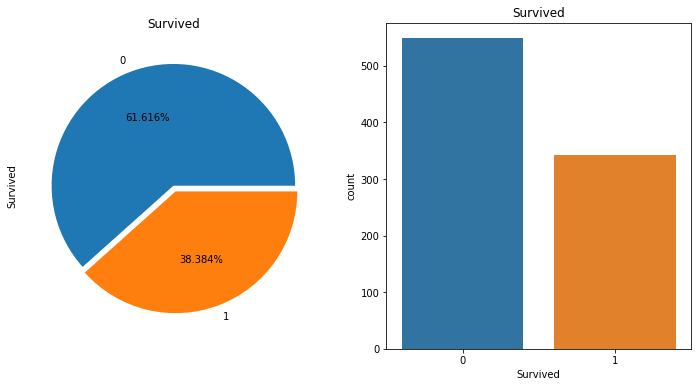

In [ ]:
# 위의 결과를 그래프로 그려보자.
# 1. 원형 차트(왼쪽)
# 2. bar 차트(오른쪽)

# 위에서 정의한대로 왼쪽과 오른쪽으로 한 행으로 그래프를 
# 그리려면... 1행,2열, 크기는 (12,6)
f, ax = plt.subplots(1,2, figsize=(12,6))

# ax는 왼쪽이냐 오른쪽이냐
# ax[0]는 왼쪽, ax[1]는 오른쪽
 
# plot.pie()함수를 사용하여 원형 차트
df['Survived'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.3f%%', ax=ax[0])
ax[0].set_title('Survived')

# seaborn의 countplot()함수를 사용하여 바 차트
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### 나이를 기준으로 히스토그램 분석

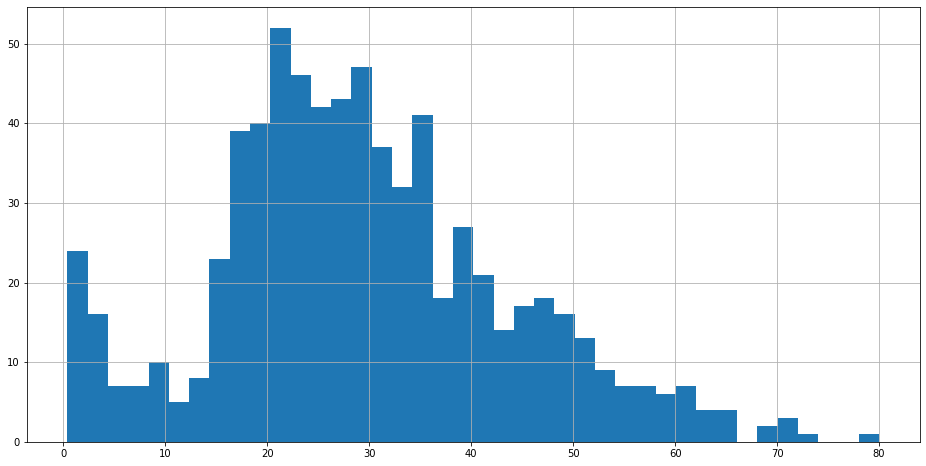

In [ ]:
# df['Age']에 대한 데이터 시각화
# 히스토그램으로 표현하는 것이 좋다.
# bins : 0.42~80세 구간을 40으로 나눈다. 한 칸당 나이는 대략 2살
# 20~22세 분포가 제일 높다. 다음은 28~30세, 22~24세
df['Age'].hist(bins=40, figsize=(16,8), grid=True)

### 선실 등급별로 생존자 데이터 분석

In [ ]:
# 내가 원하는 데이터 특성별로 데이터 카테고리화 시킬 수 있다.
# 카테고리화 시킨 후에 평균을 계산한다.
# 1등실에 가까울수록 평균 나이가 올라간다. 생존율도 같이 올라간다.
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### 생존율과 상관관계가 있는 컬럼 데이터는 무엇일까?

In [ ]:
# Pclass의 상관관계 -0.338, 반비례한다.(-) 
# 0~1 상관관계 1에 가까울 수록 상관관계가 높다. 0.338
# Fare가 높을수록 생존율이 증가한다. 0.257
# Parch는 0.0816
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 상관관계를 그래프로 시각화

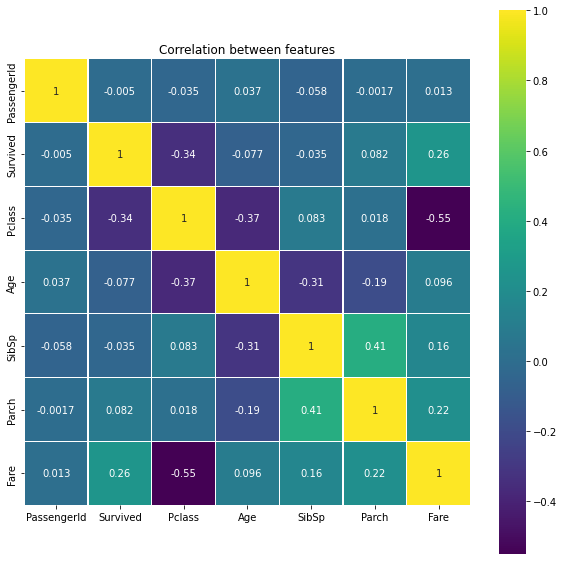

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), linewidths=0.2, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

### 나이 데이터를 구간별로 설정하기

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


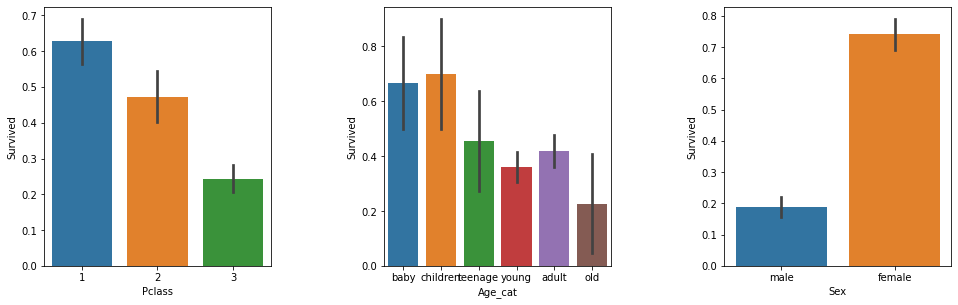

In [ ]:
df['Age_cat'] = pd.cut(df['Age'],
                       # 0~3, 3~7, 7~15, 15~30, 30~60, 60~80 
                       bins=[0,3,7,15,30,60,80],
                       include_lowest=True,
                       labels=['baby','children','teenage', 'young','adult','old'])


plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('Pclass', 'Survived', data=df)
plt.subplot(132)
sns.barplot('Age_cat', 'Survived', data=df)
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()


### 성별 생존율 분석

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


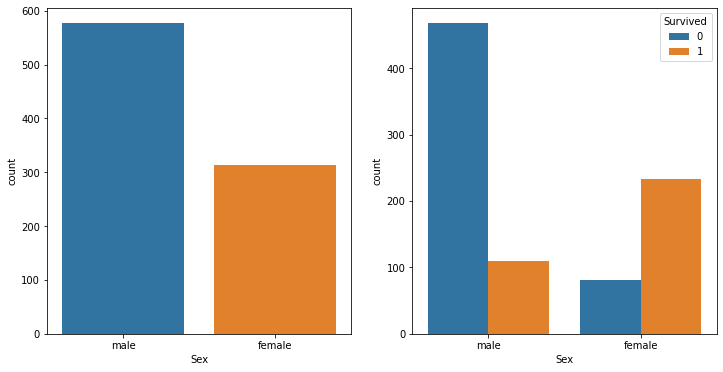

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,6))
# 
sns.countplot('Sex', data=df, ax=ax[0])
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1])
plt.show()

### **귀족들의 생존율만 다시 조사해보기**
#### 대략적으로 이름을 통해 신분을 확인할 수 있다.

In [ ]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

이름 하나만 전처리 해보기

In [ ]:
df['Name'][0]

'Braund, Mr. Owen Harris'

In [ ]:
# ','를 기준으로 뒷부분의 문자열만 취한다.
df['Name'][0].split(',')[1]

' Mr. Owen Harris'

In [ ]:
# ','를 기준으로 뒷부분의 문자열만 취하고, '.'을 기준으로 앞부분의 문자열만 취한다.
df['Name'][0].split(',')[1].split('.')[0]

' Mr'

In [ ]:
# strip()함수를 사용하여 공백 삭제
df['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

In [ ]:
# 람다함수의 예
test = lambda x:x+2

conv_rare = lambda x: x.split(',')[1].split('.')[0].strip()

# 입력을 df['Name] seires데이터를 conv_rare 람다함수에 입력으로 넣어준다.
# 입력이 seires -> 출력도 seires
df['standing'] = df['Name'].map(conv_rare)

In [ ]:
# df['standing']이 잘 생성 되었는지 확인
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,standing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young,Mr


In [ ]:
standing = df['standing'].unique()
print(standing)
print(len(standing))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
17


In [ ]:
# standing(신분)의 갯수를 확인하는데, 성별로 확인하기
# Dr의 경우 남성과 여성 모두 존재하므로
pd.crosstab(df['standing'], df['Sex'])

Sex,female,male
standing,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [ ]:
# 중복되는 신분 이름 합치기
df['standing']=df['standing'].replace('Mlle', 'Miss')
df['standing']=df['standing'].replace('Ms', 'Miss')
df['standing']=df['standing'].replace('Mme', 'Mrs')

In [ ]:
pd.crosstab(df['standing'], df['Sex'])

Sex,female,male
standing,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,185,0


In [ ]:
standing = df['standing'].unique()
print(standing)
print(len(standing))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Major' 'Lady' 'Sir' 'Col'
 'Capt' 'the Countess' 'Jonkheer']
14


## 데이터 전처리
### 결측치 채우기, 삭제
### 데이터셋 나누기

In [ ]:
# 귀족 호칭 리스트
Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    df['standing'] = df['standing'].replace(each, 'Rare')

df['standing'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [ ]:
# 생존율 비교
# Miss, Mr, Mrs, Rare 4개의 생존율 비교
df[['standing', 'Survived']].groupby(['standing'], as_index=False).mean()

,standing,Survived
0,Miss,0.702703
1,Mr,0.156673
2,Mrs,0.793651
3,Rare,0.492063


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_cat      714 non-null    category
 13  standing     891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.7+ KB


In [ ]:
# 성별 데이터를 숫자로 변경
tmp = []
for each in df['Sex']:
    if each=='female':
        tmp.append(0)
    elif each=='male':
        tmp.append(1) 
    else:
        tmp.appned(np.nan)      

In [ ]:
df['Sex'] = tmp
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,standing
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,young,Mr
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,Miss
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adult,Mrs
4,5,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adult,Mr


In [ ]:
df['Survived'] = df['Survived'].astype('float16')
df['Pclass'] = df['Pclass'].astype('float16')
df['Sex'] = df['Sex'].astype('float16')
df['SibSp'] = df['SibSp'].astype('float16')
df['Parch'] = df['Parch'].astype('float16')
df['Fare'] = df['Fare'].astype('float16')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,standing
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.250000,NaN,S,young,Mr
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.312500,C85,C,adult,Mrs
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.925781,NaN,S,young,Miss
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.093750,C123,S,adult,Mrs
4,5,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.046875,NaN,S,adult,Mr


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    float16 
 2   Pclass       891 non-null    float16 
 3   Name         891 non-null    object  
 4   Sex          891 non-null    float16 
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    float16 
 7   Parch        891 non-null    float16 
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float16 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_cat      714 non-null    category
 13  standing     891 non-null    object  
dtypes: category(1), float16(6), float64(1), int64(1), object(5)
memory usage: 60.4+ KB


In [ ]:
# 나이에 대한 결측치 채우기
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
# 탑승했던 항구에 대한 결측치 채우기
# 최빈값으로 결측치 채우기
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# 나중에 scikit-learn의 simpleImputer를 활용하여 결측치 채우기 연습


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    float16 
 2   Pclass       891 non-null    float16 
 3   Name         891 non-null    object  
 4   Sex          891 non-null    float16 
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    float16 
 7   Parch        891 non-null    float16 
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float16 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Age_cat      714 non-null    category
 13  standing     891 non-null    object  
dtypes: category(1), float16(6), float64(1), int64(1), object(5)
memory usage: 60.4+ KB


## 모델 생성하고 학습하고, 평가하기
### 기본적인 모델들만 사용해보고, 

In [ ]:
# 학습시에 몇등실에 탑승했는지, 성별이 무엇인지, 나이가 어떻게 되는지, 가족관계, 요금
# 생존자 예측을 할 수 있도록 모델 학습
train_choice = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
train_choice.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.250000
1,1.0,0.0,38.0,1.0,0.0,71.312500
2,3.0,0.0,26.0,0.0,0.0,7.925781
3,1.0,0.0,35.0,1.0,0.0,53.093750
4,3.0,1.0,35.0,0.0,0.0,8.046875


In [ ]:
# 데이터셋을 학습용과 테스트용으로 분할하기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_choice, df['Survived'], test_size=0.2, random_state=123)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 329 to 510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    float16
 1   Sex     712 non-null    float16
 2   Age     712 non-null    float64
 3   SibSp   712 non-null    float16
 4   Parch   712 non-null    float16
 5   Fare    712 non-null    float16
dtypes: float16(5), float64(1)
memory usage: 18.1 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 172 to 221
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  179 non-null    float16
 1   Sex     179 non-null    float16
 2   Age     179 non-null    float64
 3   SibSp   179 non-null    float16
 4   Parch   179 non-null    float16
 5   Fare    179 non-null    float16
dtypes: float16(5), float64(1)
memory usage: 4.5 KB


In [ ]:
# index값을 다시 숫자를 부여해야한다.
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
329,1.0,0.0,16.0,0.0,1.0,57.968750
749,3.0,1.0,31.0,0.0,0.0,7.750000
203,3.0,1.0,45.5,0.0,0.0,7.226562
421,3.0,1.0,21.0,0.0,0.0,7.734375
97,1.0,1.0,23.0,0.0,1.0,63.343750


In [ ]:
# index 새로 부여하기
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,0.0,16.0,0.0,1.0,57.968750
1,3.0,1.0,31.0,0.0,0.0,7.750000
2,3.0,1.0,45.5,0.0,0.0,7.226562
3,3.0,1.0,21.0,0.0,0.0,7.734375
4,1.0,1.0,23.0,0.0,1.0,63.343750


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# step 1. 모델 객체 생성
dtc = DecisionTreeClassifier(random_state=123)

# step 2. 학습(훈련데이터)
dtc.fit(x_train, y_train)

# step 3. 예측(추론)
y_pred = dtc.predict(x_test)

# step 4. 정확도 출력
#print((y_test==y_pred).mean())
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7932960893854749
0.6891891891891891
0.7846153846153846
0.7338129496402878


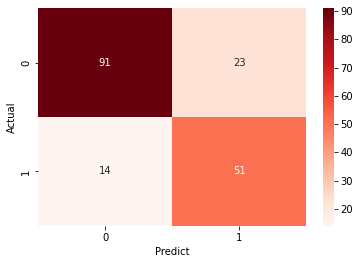

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = confusion_matrix(y_test, y_pred)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

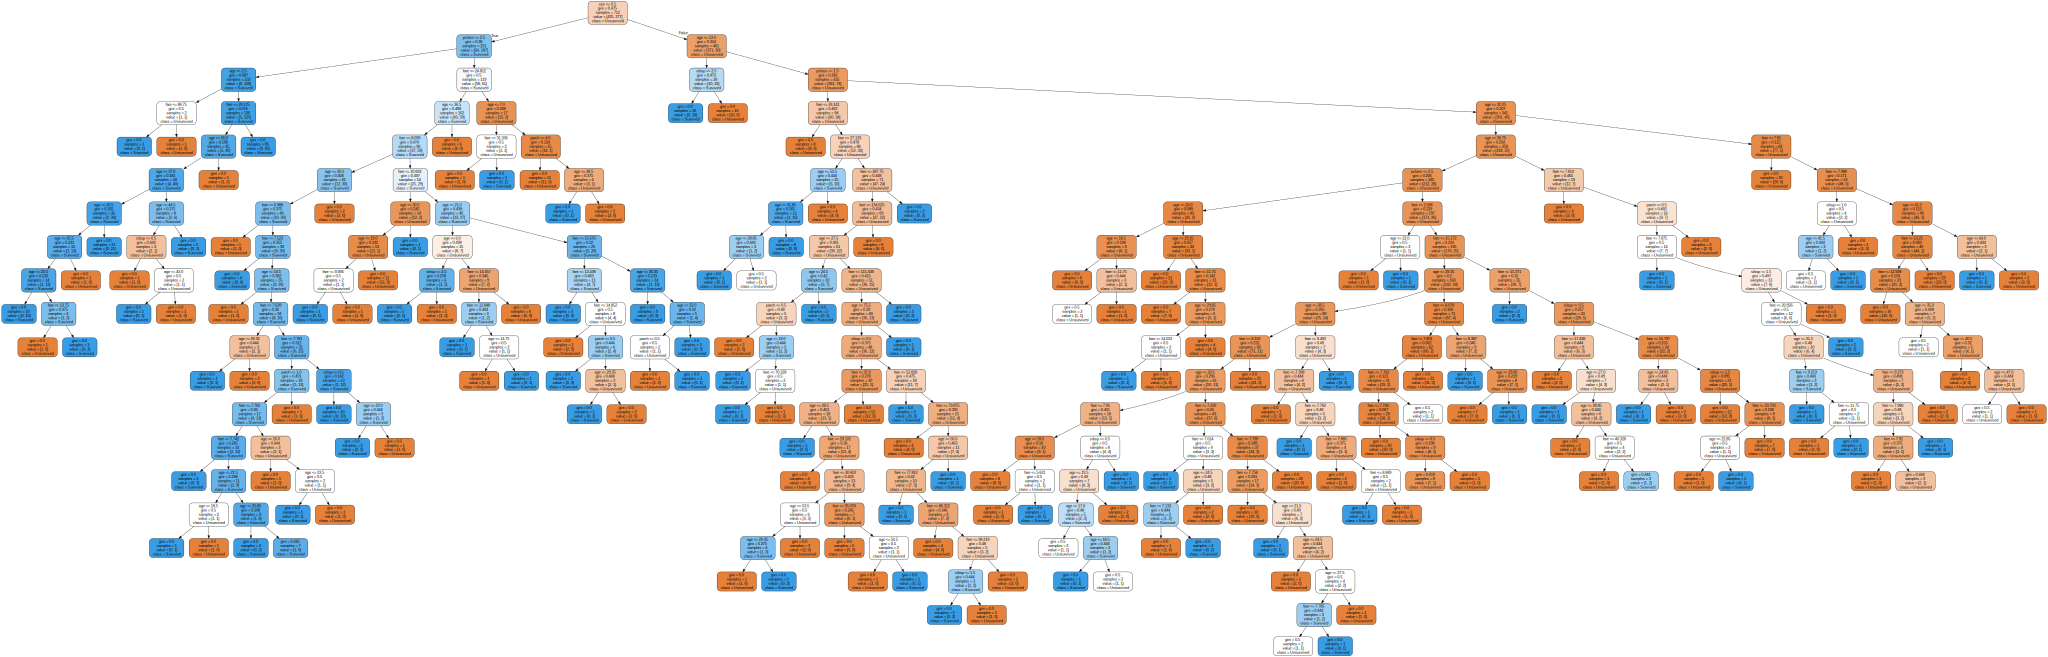

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# 결정 트리 모델을 시각화
# dot파일을 생성
export_graphviz(dtc, out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

# dot파일을 png파일로 변환
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6815642458100558
0.5588235294117647
0.5846153846153846
0.5714285714285715


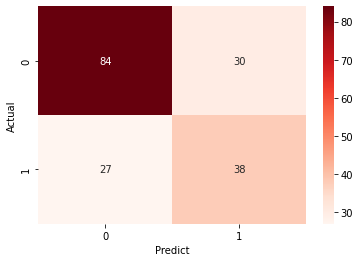

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = confusion_matrix(y_test, y_pred)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8044692737430168
0.7142857142857143
0.7692307692307693
0.7407407407407408


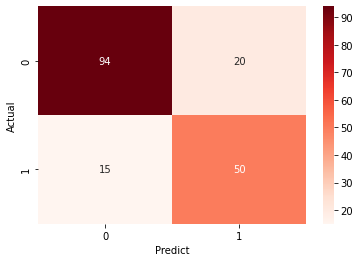

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = confusion_matrix(y_test, y_pred)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## SGD Classifier

0.7597765363128491
0.6145833333333334
0.9076923076923077
0.7329192546583851


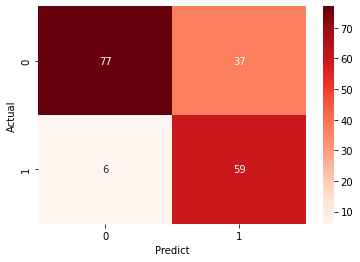

In [ ]:
from sklearn.linear_model import SGDClassifier

# 과대적합(overfitting) 을 방지하기 위해 L1 (regularization = penalty)
model = SGDClassifier(penalty='l1', random_state=123, n_jobs=-1, learning_rate='optimal')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = confusion_matrix(y_test, y_pred)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

0.8212290502793296
0.7391304347826086
0.7846153846153846
0.7611940298507462


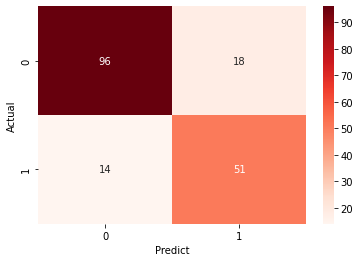

In [ ]:
# 랜덤포레스트 모델
# decision tree : 나무가 여러 그루 -> 숲(포레스트)
# dt모델을 여러 개를 생성해서 그것들의 조합으로 결과값을 출력
# 일반적으로는 Decision Tree모델의 성능과 비슷하거나 더 좋은 성능을 보일 수 있다.
from sklearn.ensemble import RandomForestClassifier

# step 1. 모델 객체 생성
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# step 2. 학습(학습용 데이터)
random_forest.fit(x_train, y_train)

# step 3. 예측(추론)
y_pred = random_forest.predict(x_test)

# step 4. 성능 평가 지표
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = confusion_matrix(y_test, y_pred)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [ ]:
# https://hmiiing.tistory.com/entry/kaggle-Titanic-data-%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0-1-EDA
